#Regression - Yes Bank Stock Closing Price Prediction

##Business Context
Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.

###GITHUB LINK- https://github.com/ManthanBohra/YES-BANK-Stock-Prices-Prediction

#IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


Pandas: Used for data manipulation and handling tabular data.<br>
 NumPy: Used for numerical operations like calculating RMSE.<br>
 Matplotlib & Seaborn: Used for visualizing stock price trends and model predictions.<br>
 Scikit-Learn: Used for data splitting, model training, and performance evaluation.<br>

In [ ]:
# Load dataset
df = pd.read_csv("data_YesBank_StockPrices.csv")
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


#DATA PREPROCESSING

In [ ]:

df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')
df = df.sort_values(by='Date')
df.set_index('Date', inplace=True)

 1)Convert 'Date' to datetime format from string format <br>
 2)Sorts the dataset by date to maintain chronological order.<br>
 3)Sets Date as the index, making it suitable for time-series analysis.

In [ ]:
df.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Year,0
Month,0
Prev_Close,0
Price_Change,0


Check if data has a null value or not.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 184 entries, 2005-08-01 to 2020-11-01
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          184 non-null    float64
 1   High          184 non-null    float64
 2   Low           184 non-null    float64
 3   Close         184 non-null    float64
 4   Year          184 non-null    int32  
 5   Month         184 non-null    int32  
 6   Prev_Close    184 non-null    float64
 7   Price_Change  184 non-null    float64
dtypes: float64(6), int32(2)
memory usage: 11.5 KB


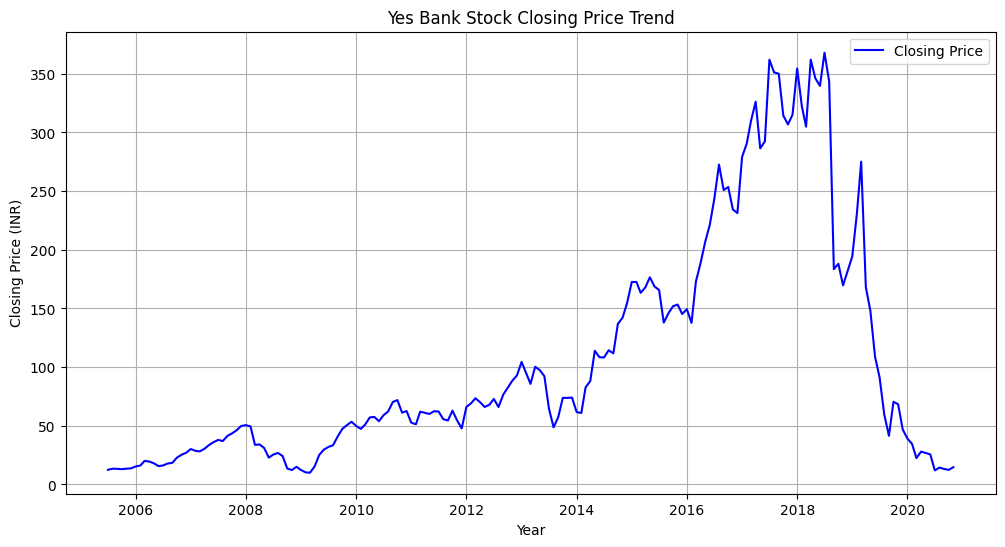

In [ ]:
# Data visualization
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x=df.index, y='Close', label='Closing Price', color='blue')
plt.xlabel('Year')
plt.ylabel('Closing Price (INR)')
plt.title('Yes Bank Stock Closing Price Trend')
plt.legend()
plt.grid()
plt.show()

Uses Seaborn's lineplot() to visualize the closing stock price over time.<br>
Helps us identify trends, spikes, or crashes in the stock price.<br>
Matplotlib is used to format the plot (title, labels, grid, etc.).

In [ ]:
# Feature Engineering
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Prev_Close'] = df['Close'].shift(1)
df['Price_Change'] = df['Close'] - df['Prev_Close']
df.dropna(inplace=True)

In [ ]:
# Prepare data for training
features = ['Open', 'High', 'Low', 'Prev_Close', 'Year', 'Month']
target = 'Close'
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train a RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Predictions
y_pred = model.predict(X_test)
y_pred

array([ 27.7301,  13.1976, 352.5636, 147.696 , 313.9025,  23.9034,
        34.2863,  63.1987, 167.6236,  66.6955,  63.4185, 191.8146,
        60.3212,  39.6393,  19.0133,  26.5458,  48.7996,  25.8789,
        67.4047,  53.6756, 209.5572, 151.0256, 347.7178,  48.6606,
        19.2535, 149.466 ,  62.8275,  29.7697,  59.6728, 167.5293,
        56.5146,  49.9442, 167.1837, 241.9602,  50.4985,  43.906 ,
        58.8813])

In [ ]:
# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')

MAE: 7.573786486486492
MSE: 182.30822242189248
RMSE: 13.502156213801278
R2 Score: 0.9775744877296995


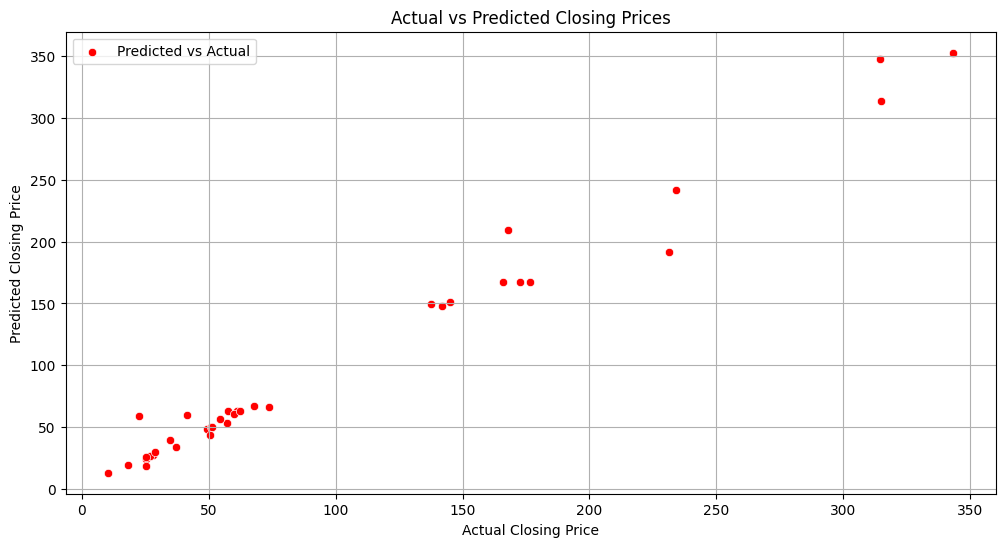

In [ ]:
# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_test, y=y_pred, color='red', label='Predicted vs Actual')
plt.xlabel('Actual Closing Price')
plt.ylabel('Predicted Closing Price')
plt.title('Actual vs Predicted Closing Prices')
plt.legend()
plt.grid()
plt.show()